### Lending Club dataset

In [2]:
#Essential imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

#Visualization
import matplotlib.pyplot as plt
%matplotlib inline

#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [7]:
df1 = pd.read_csv('./LoanStats_securev1_2019Q4.csv', sep=',', skiprows=1, low_memory=False)
df1


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,163477201,NaN,5000.0,5000.0,5000.0,36 months,17.74%,180.12,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,164027473,NaN,20000.0,20000.0,20000.0,36 months,12.40%,668.12,B,B4,...,393.88,19282.07,668.12,N,NaN,NaN,NaN,NaN,NaN,NaN
2,164137439,NaN,33000.0,33000.0,33000.0,60 months,15.24%,789.24,C,C2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,162948736,NaN,19000.0,19000.0,18975.0,36 months,6.46%,581.99,A,A1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,164131732,NaN,15000.0,15000.0,15000.0,36 months,7.02%,463.30,A,A2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128255,158748525,NaN,19000.0,19000.0,19000.0,36 months,6.46%,581.99,A,A1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128256,158298751,NaN,10000.0,10000.0,10000.0,60 months,28.80%,316.21,D,D5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128257,158206429,NaN,14875.0,14875.0,14875.0,36 months,16.95%,529.97,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128258,Total amount funded in policy code 1: 2087537550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The initial data set contains ... rows and 145 columns. Running df1.isnull().sum() shows that there is a number of columns with majority data missing: these columns would not be of use and will have to removed. 

Since the data set is large, removing unnecesary data won't cause much loss of data and will allow me to focus on the data that is informative. 

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128260 entries, 0 to 128259
Columns: 150 entries, id to settlement_term
dtypes: float64(112), object(38)
memory usage: 146.8+ MB


In [9]:
df1.shape

(128260, 150)

In [10]:
df1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object', length=150)

In [11]:
df1.dtypes

id                        object
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 150, dtype: object

### A look at the missing values

In [12]:
df1.isnull().sum()

id                            0
member_id                128260
loan_amnt                     2
funded_amnt                   2
funded_amnt_inv               2
                          ...  
settlement_status        128258
settlement_date          128258
settlement_amount        128258
settlement_percentage    128258
settlement_term          128258
Length: 150, dtype: int64

In [13]:
df1.isnull().mean()

id                       0.000000
member_id                1.000000
loan_amnt                0.000016
funded_amnt              0.000016
funded_amnt_inv          0.000016
                           ...   
settlement_status        0.999984
settlement_date          0.999984
settlement_amount        0.999984
settlement_percentage    0.999984
settlement_term          0.999984
Length: 150, dtype: float64

In [14]:
df1['settlement_status'].value_counts(dropna=False)

NaN       128258
ACTIVE         2
Name: settlement_status, dtype: int64

In [15]:
df1['member_id'].value_counts(dropna=False)

NaN    128260
Name: member_id, dtype: int64

In [32]:
df1['desc'].value_counts()

Series([], Name: desc, dtype: int64)

In [16]:
df1.columns[df1.isna().any()].tolist()

['member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joi

In [17]:
df1.loc[:, df1.isna().any()]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,5000.0,5000.0,5000.0,36 months,17.74%,180.12,C,C5,Lead Mtc Tech,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,20000.0,20000.0,20000.0,36 months,12.40%,668.12,B,B4,NaN,...,393.88,19282.07,668.12,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,33000.0,33000.0,33000.0,60 months,15.24%,789.24,C,C2,Financial Analyst,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,19000.0,19000.0,18975.0,36 months,6.46%,581.99,A,A1,Tech Ops Analyst,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,15000.0,15000.0,15000.0,36 months,7.02%,463.30,A,A2,Program Manager,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128255,NaN,19000.0,19000.0,19000.0,36 months,6.46%,581.99,A,A1,Professor,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128256,NaN,10000.0,10000.0,10000.0,60 months,28.80%,316.21,D,D5,NaN,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128257,NaN,14875.0,14875.0,14875.0,36 months,16.95%,529.97,C,C4,NaN,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### A look at the transactions data by State

In [18]:
#Geographical concentration of loans - CA, NY, TX, FL, IL are top 5 states by count (transaction count)
df1['addr_state'].value_counts(dropna=False)

CA     17779
TX     10755
FL     10134
NY      9643
IL      4830
NJ      4623
GA      4386
OH      4064
PA      4012
NC      3558
VA      3366
MI      3162
AZ      3133
MD      3063
MA      3050
WA      2704
CO      2465
TN      2176
MN      2114
IN      2113
MO      2079
CT      2042
NV      1869
SC      1778
OR      1661
WI      1659
AL      1464
LA      1355
KY      1250
OK      1156
KS       994
AR       969
UT       904
MS       819
WV       792
NM       673
NH       628
HI       608
NE       607
RI       602
ID       523
ME       415
DE       356
MT       339
VT       313
AK       281
ND       269
DC       244
WY       242
SD       237
NaN        2
Name: addr_state, dtype: int64

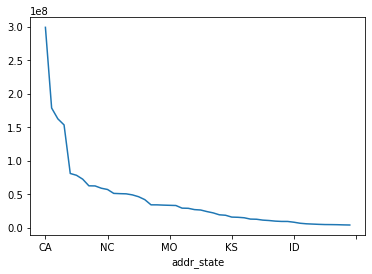

In [19]:
# CA, TX, NY are top 3 states by total amount of transactions
df1.groupby(by='addr_state')['loan_amnt'].sum().sort_values(ascending=False).plot();

### Loan Status and Loan Purpose

**Loan Status** is our potential target variable. 

In [28]:
df1['purpose'].value_counts(dropna=False)

debt_consolidation    69557
credit_card           35427
other                  7593
home_improvement       7180
major_purchase         2250
medical                1556
house                  1028
car                    1005
small_business          983
vacation                938
moving                  665
renewable_energy         76
NaN                       2
Name: purpose, dtype: int64

In [34]:
df1['loan_status'].value_counts(dropna=False)

Current               117482
Fully Paid              7836
Late (31-120 days)      1134
In Grace Period          857
Charged Off              705
Late (16-30 days)        228
Default                   16
NaN                        2
Name: loan_status, dtype: int64

In [30]:
## Find the mean loan amount for loans with 0 and 1 status (Current status of the loan)
df1.groupby(by='loan_status')['loan_amnt'].mean()

loan_status
Charged Off           16430.496454
Current               16426.271897
Default               16620.312500
Fully Paid            13910.617662
In Grace Period       17432.788798
Late (16-30 days)     16378.837719
Late (31-120 days)    16066.115520
Name: loan_amnt, dtype: float64

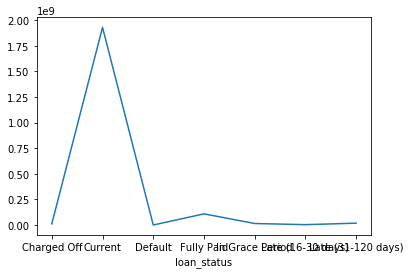

In [37]:
df1.groupby(by='loan_status')['loan_amnt'].sum().plot()

In [36]:
## Loan Status vs Fico score
df1.groupby(by='loan_status')['fico_range_low'].mean()

loan_status
Charged Off           707.567376
Current               704.642711
Default               690.625000
Fully Paid            711.715161
In Grace Period       696.651109
Late (16-30 days)     703.377193
Late (31-120 days)    696.507937
Name: fico_range_low, dtype: float64

### Loan grade and Loan Amount, Income, and Interest rate

In [38]:
## Loan grade by mean Income
df1.groupby(by='grade')['annual_inc'].mean().sort_values(ascending=False)

grade
A    94062.698661
B    85958.287098
C    79885.682031
D    78488.911471
Name: annual_inc, dtype: float64

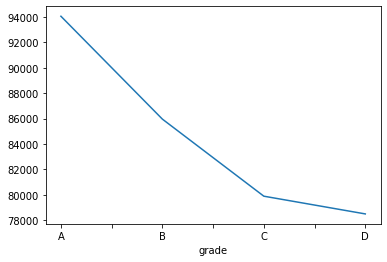

In [39]:
## Loan grade by mean Income
df1.groupby(by='grade')['annual_inc'].mean().sort_values(ascending=False).plot();

In [40]:
## Loan Amount by grade - grades C, B, and A are the most common
df1.groupby(by='grade')['loan_amnt'].sum().sort_values(ascending=False)

grade
A    654138250.0
B    644650950.0
C    479605650.0
D    309142700.0
Name: loan_amnt, dtype: float64

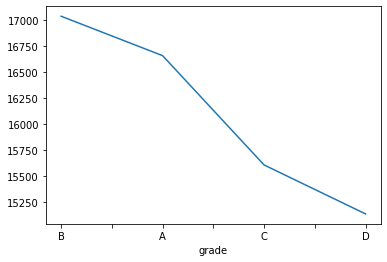

In [41]:
##Loan grade by mean Loan Amount
df1.groupby(by='grade')['loan_amnt'].mean().sort_values(ascending=False).plot()

In [44]:
# ## Interest rate by grade
# df1.groupby(by='grade')['int_rate'].mean().sort_values(ascending=False)

In [45]:
def view_dist (df, column):
    return (plt.figure(figsize= (8,6)), 
            sns.distplot(df[column],kde = True, color='blue'), 
            plt.title(f'Distribution of {column}'))

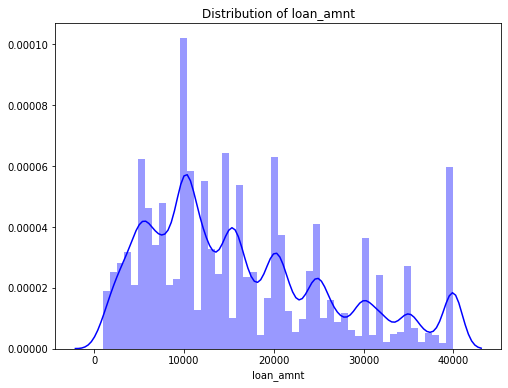

In [46]:
view_dist(df1, 'loan_amnt');

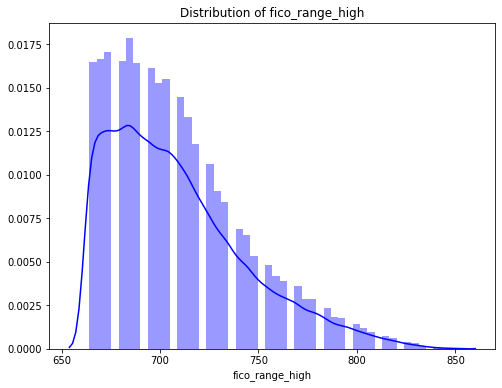

In [48]:
view_dist(df1, 'fico_range_high');

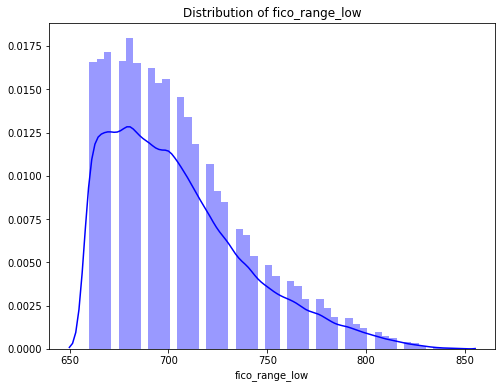

In [49]:
view_dist(df1, 'fico_range_low');

### Exploring the Loan Status

In [54]:
#Loan_status vs purpose
purp_loan= ['purpose', 'loan_status']
cm = sns.light_palette("blue", as_cmap=True)
(round(pd.crosstab(df1[purp_loan[0]], df1[purp_loan[1]], 
                   normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
purpose,,,,,,,
car,0.280000,0.750000,0.000000,1.330000,0.350000,0.880000,0.710000
credit_card,21.280000,28.090000,25.000000,22.150000,24.970000,26.320000,22.660000
debt_consolidation,55.040000,54.350000,62.500000,51.230000,60.210000,53.510000,58.110000
home_improvement,6.100000,5.470000,0.000000,7.800000,4.780000,6.140000,4.410000
house,0.990000,0.760000,0.000000,1.340000,0.930000,0.880000,1.150000
major_purchase,3.120000,1.670000,0.000000,2.990000,1.170000,0.880000,1.410000
medical,2.130000,1.170000,0.000000,1.700000,1.050000,3.510000,1.940000
moving,0.850000,0.490000,0.000000,0.980000,0.350000,0.440000,0.620000
other,8.370000,5.740000,12.500000,8.560000,4.670000,6.580000,5.730000


#### Logistic Regression to predict the probability of default

In [32]:
#Define X and y

X = df.drop('loan_status', axis=1)
y = df[['loan_status']]

In [33]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [34]:
#Instantiate
logreg = LogisticRegression(solver = 'lbfgs')

#Fit
logreg.fit(X_train, y_train)

#Print coef
print(f'Logistic Regression Coefficient: {logreg.coef_}')
print(f'Logistic Regression Intercept: {logreg.intercept_}')

Logistic Regression Coefficient: [[-6.29537370e-08 -4.06760405e-05 -2.68021299e-08  1.06497825e-04
   9.26359666e-08  2.57761972e-09 -1.04522685e-08 -6.54340685e-09
   9.54041623e-11 -4.51861653e-09  8.54286533e-09  3.03263492e-09
  -3.54025030e-09  1.50573787e-09  1.44105643e-09 -8.89773145e-10
  -3.97315967e-09 -1.09804383e-08 -5.91977490e-09 -1.34903083e-09
   1.09481608e-08  3.58767605e-09  8.97909817e-10  3.91743429e-10
  -9.60162851e-09  7.17787462e-09]]
Logistic Regression Intercept: [-2.42375389e-09]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
np.exp(logreg.coef_)

array([[0.99999994, 0.99995932, 0.99999997, 1.0001065 , 1.00000009,
        1.        , 0.99999999, 0.99999999, 1.        , 1.        ,
        1.00000001, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.99999999, 0.99999999, 1.        ,
        1.00000001, 1.        , 1.        , 1.        , 0.99999999,
        1.00000001]])

In [36]:
# Step 4: Evaluate model.
print(f'Logistic Regression Accuracy Score: {logreg.score(X_test, y_test)}')

#Accuracy is number of correct predictioons / number of predictions

Logistic Regression Accuracy Score: 0.8034623217922607


In [40]:
#Predicting the values - testing set

logreg.predict_proba(X_test)

array([[0.52379491, 0.47620509],
       [0.69537125, 0.30462875],
       [0.70067182, 0.29932818],
       ...,
       [0.70771176, 0.29228824],
       [0.49777981, 0.50222019],
       [0.88869065, 0.11130935]])

In [37]:
#Stats Models
import statsmodels.api as sm

In [38]:
statsmod = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.340511
         Iterations 8


In [39]:
statsmod.summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                17675
Model:                          Logit   Df Residuals:                    17652
Method:                           MLE   Df Model:                           22
Date:                Tue, 02 Jun 2020   Pseudo R-squ.:                  0.3517
Time:                        02:49:23   Log-Likelihood:                -6018.5
converged:                       True   LL-Null:                       -9283.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
person_age                        -0.0138      0.008     -1.717      0.086      -0.030       0.002
person_income                    1.96e-06   7.37e-07      2.659      0.008    5.15e-07     3.4e-06
person_emp_length                 -0.0123      0.007     -1.889      0.059      -0.025       0.000
loan_amnt                         -0.0001   6.25e-06    -17.459      0.000      -0.000   -9.68e-05
loan_int_rate                      0.0919      0.023      3.969      0.000       0.047       0.137
loan_percent_income               13.3452      0.360     37.046      0.000      12.639      14.051
cb_person_cred_hist_length         0.0150      0.012      1.242      0.214      -0.009       0.039
person_home_ownership_MORTGAGE    -0.9144        nan        nan        nan         nan         nan
person_home_ownership_OTHER       -0.1302        nan        nan        nan         nan         nan
person_home_ownership_OWN         -2.8660        nan        nan        nan         nan         nan
person_home_ownership_RENT        -0.0948        nan        nan        nan         nan         nan
loan_intent_DEBTCONSOLIDATION      0.3439   2.14e+06   1.61e-07      1.000    -4.2e+06     4.2e+06
loan_intent_EDUCATION             -0.5599   2.22e+06  -2.52e-07      1.000   -4.35e+06    4.35e+06
loan_intent_HOMEIMPROVEMENT        0.3756   2.21e+06    1.7e-07      1.000   -4.34e+06    4.34e+06
loan_intent_MEDICAL                0.1481   2.22e+06   6.68e-08      1.000   -4.34e+06    4.34e+06
loan_intent_PERSONAL              -0.2706   2.28e+06  -1.19e-07      1.000   -4.46e+06    4.46e+06
loan_intent_VENTURE               -0.7862    2.2e+06  -3.58e-07      1.000   -4.31e+06    4.31e+06
loan_grade_A                      -2.1471        nan        nan        nan         nan         nan
loan_grade_B                      -2.1067        nan        nan        nan         nan         nan
loan_grade_C                      -1.9501        nan        nan        nan         nan         nan
loan_grade_D                       0.0541        nan        nan        nan         nan         nan
loan_grade_E                       0.2880        nan        nan        nan         nan         nan
loan_grade_F                       0.3016        nan        nan        nan         nan         nan
loan_grade_G                       2.8082        nan        nan        nan         nan         nan
cb_person_default_on_file_N       -1.3631        nan        nan        nan         nan         nan
cb_person_default_on_file_Y       -1.3523        nan        nan        nan         nan         nan
==================================================================================================
"""